In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read csv file

In [3]:
df1=pd.read_csv('/home/deslin/AIML/rubber plantation/rubberestate/rubber-paidemployee.csv')

In [4]:
df2=pd.read_csv('/home/deslin/AIML/rubber plantation/rubberestate/rubber-plantedarea.csv')

In [5]:
df3=pd.read_csv('/home/deslin/AIML/rubber plantation/rubberestate/rubber-production.csv')

In [6]:
df4=pd.read_csv('/home/deslin/AIML/rubber plantation/rubberestate/rubber-taparea.csv')

In [7]:
df5=pd.read_csv('/home/deslin/AIML/rubber plantation/rubberestate/rubber-yield.csv')

In [8]:
df1.shape #checking dimensions

(50, 2)

In [9]:
df2.shape

(50, 2)

In [10]:
df3.shape

(50, 2)

In [11]:
df4.shape

(50, 2)

In [12]:
df5.shape

(50, 2)

each data file have same dimesion so we merge it into a single file

In [13]:
df1.columns

Index(['Year', 'Total Number of Paid Employee During the Last Pay Period (Estate)'], dtype='object')

In [14]:
df2.columns

Index(['Year', 'Planted Area (Estate) ('000) Hectare'], dtype='object')

In [15]:
df3.columns

Index(['Year', 'Production (Estate) ('000) Tonne'], dtype='object')

In [16]:
df4.columns

Index(['Year', 'Tapped Area (Estate) ('000) Hectare'], dtype='object')

In [17]:
df5.columns

Index(['Year', 'Yeild per Hectare (Estate) (Kg)'], dtype='object')

#### Rename column names
column headings were too long for each of the data file so rename the column names to short.

In [18]:
df1=df1.rename(columns={"Total Number of Paid Employee During the Last Pay Period (Estate)": "TotalPaidEmployee"})

In [19]:
df2=df2.rename(columns={"Planted Area (Estate) ('000) Hectare": "AreaPlantedHect"})

In [20]:
df3=df3.rename(columns={"Production (Estate) ('000) Tonne": "ProduceTonne"})

In [21]:
df4=df4.rename(columns={"Tapped Area (Estate) ('000) Hectare": "TapAreaHect"})

In [22]:
df5=df5.rename(columns={"Yeild per Hectare (Estate) (Kg)": "YieldperHectKg"})

### Data pre-processing (joining the tables)

In [23]:
join1=pd.merge(df1,df2,how="inner",on="Year")

In [24]:
join2=pd.merge(df3,df4,how="inner",on="Year")

In [25]:
join3=pd.merge(join2,df5,how="inner",on="Year")

In [26]:
data =pd.merge(join1,join3,how="inner",on="Year") 

In [27]:
data.head()

,Year,TotalPaidEmployee,AreaPlantedHect,ProduceTonne,TapAreaHect,YieldperHectKg
0,1965,262.1,788.5,507.9,542.3,937
1,1966,258.4,770.0,531.2,536.8,990
2,1967,235.4,744.8,543.5,535.1,1016
3,1968,209.8,715.1,581.8,533.3,1090
4,1969,212.7,695.6,612.2,539.2,1136


In [28]:
data.shape

(50, 6)

In [29]:
data.dtypes

Year                   int64
TotalPaidEmployee    float64
AreaPlantedHect      float64
ProduceTonne         float64
TapAreaHect          float64
YieldperHectKg         int64
dtype: object

In [30]:
# the TotalPaidEmployee must be int64 type
# convert TotalPaidEmployee column type to int

In [31]:
data['TotalPaidEmployee']=data['TotalPaidEmployee'].astype('int64')
(data['TotalPaidEmployee']).dtypes

dtype('int64')

In [32]:
##checking misssing value

In [33]:
data.isna().sum()

Year                 0
TotalPaidEmployee    0
AreaPlantedHect      0
ProduceTonne         0
TapAreaHect          0
YieldperHectKg       0
dtype: int64

In [34]:
data.describe()

,Year,TotalPaidEmployee,AreaPlantedHect,ProduceTonne,TapAreaHect,YieldperHectKg
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1989.50000,103.100000,352.942000,364.270000,277.416000,1346.980000
std,14.57738,80.141266,239.995003,233.715742,185.049172,127.585024
min,1965.00000,10.000000,49.700000,53.000000,38.500000,937.000000
25%,1977.25000,16.500000,87.475000,88.625000,64.625000,1303.500000
50%,1989.50000,104.500000,354.850000,414.700000,307.050000,1381.000000
75%,2001.75000,173.500000,554.250000,580.975000,433.400000,1420.000000
max,2014.00000,262.000000,788.500000,684.600000,542.300000,1525.000000


#### Data visualization: 
visualizing data in pursuit of finding relationship between predictors

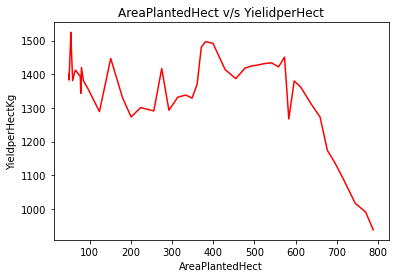

In [35]:
sns.lineplot(x=data['AreaPlantedHect'],y=data['YieldperHectKg'],color='red')
plt.plot()
plt.title("AreaPlantedHect v/s YielidperHect")
plt.show()

###### An interesting pattern is revealed . The yield per hectare has a sharp decline (after 600 hectares) as plantation area increases.

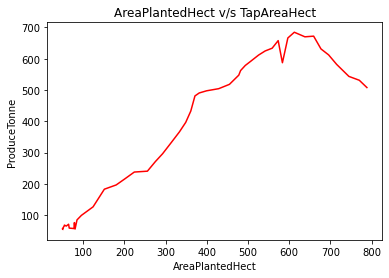

In [36]:
sns.lineplot(x=data['AreaPlantedHect'],y=data['ProduceTonne'],color='red')
plt.plot()
plt.title("AreaPlantedHect v/s TapAreaHect")
plt.show()

##### We see that produce increases with area but then it begins to decline after 600 hectares

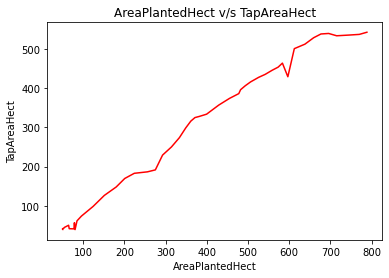

In [37]:
sns.lineplot(x=data['AreaPlantedHect'],y=data['TapAreaHect'],color='red')
plt.plot()
plt.title("AreaPlantedHect v/s TapAreaHect")
plt.show()

##### we notice a positive linear relationship between area planted and paid employees but there is a sharp decline at 600 hectares persists

[]

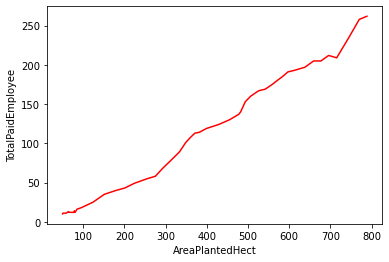

In [38]:
sns.lineplot(x=data['AreaPlantedHect'],y=data['TotalPaidEmployee'],color='red')
plt.plot()

###### we notice a positive linear relationship between area planted and paid employees.
land size increases more labour is required

#### corelation - heatmap

In [39]:
cor_mat=(data.corr()).T
cor_mat

,Year,TotalPaidEmployee,AreaPlantedHect,ProduceTonne,TapAreaHect,YieldperHectKg
Year,1.000000,-0.981907,-0.987947,-0.942827,-0.986386,0.526138
TotalPaidEmployee,-0.981907,1.000000,0.995440,0.934294,0.986364,-0.536090
AreaPlantedHect,-0.987947,0.995440,1.000000,0.942699,0.992988,-0.542327
ProduceTonne,-0.942827,0.934294,0.942699,1.000000,0.969957,-0.256589
TapAreaHect,-0.986386,0.986364,0.992988,0.969957,1.000000,-0.470293
YieldperHectKg,0.526138,-0.536090,-0.542327,-0.256589,-0.470293,1.000000


TotalPaidEmployee,AreaPlantedHect,ProduceTonee and TapAreaHect have a strong positive correlationship.
Let’s visualize it.

<AxesSubplot:>

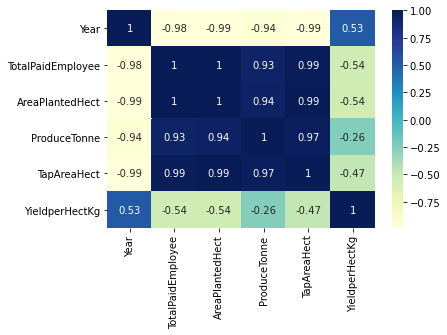

In [40]:
sns.heatmap(cor_mat, cmap="YlGnBu", annot=True)

##### there is a negative correlation (-0.54)between Area PlantedHect and and YeildperHect.
proving the point above that the yield per hectare decreases as plantation size increases

In [41]:
data.corr()['YieldperHectKg']

Year                 0.526138
TotalPaidEmployee   -0.536090
AreaPlantedHect     -0.542327
ProduceTonne        -0.256589
TapAreaHect         -0.470293
YieldperHectKg       1.000000
Name: YieldperHectKg, dtype: float64

In [42]:
#checking oulier values
#for visualizing boxplot we use seaborn
import warnings
warnings.filterwarnings("ignore")

In [43]:
cols =data.columns

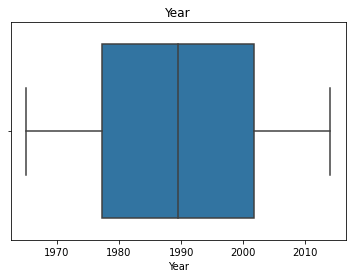

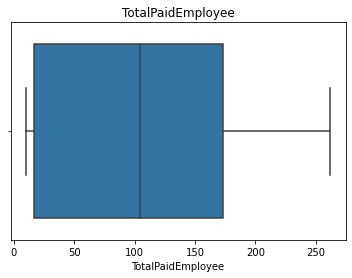

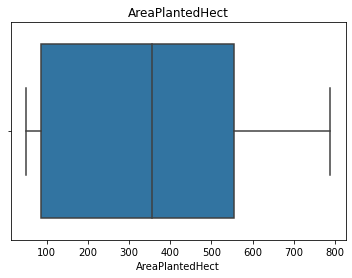

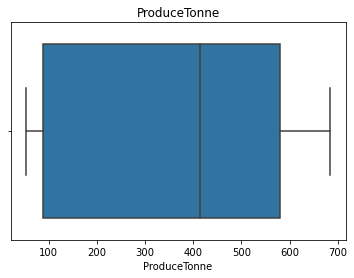

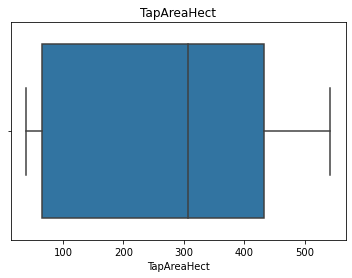

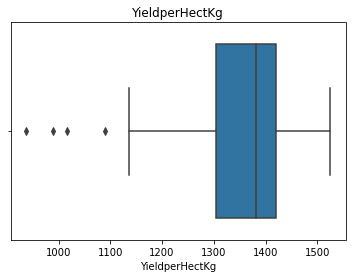

In [44]:
for x in cols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [45]:
#we need to replace/remove the outlier values

In [46]:
descr = data['YieldperHectKg'].describe()
descr


count      50.000000
mean     1346.980000
std       127.585024
min       937.000000
25%      1303.500000
50%      1381.000000
75%      1420.000000
max      1525.000000
Name: YieldperHectKg, dtype: float64

In [47]:
IQR = descr['75%'] - descr['25%']
upper_limit =  descr['75%'] + 1.5 * IQR
lower_limit =  descr['25%'] - 1.5 * IQR  

In [48]:
upper_limit

1594.75

In [49]:
lower_limit


1128.75

In [50]:
#outlier replacement
data['YieldperHectKg'][data['YieldperHectKg']<lower_limit] = lower_limit

<AxesSubplot:xlabel='YieldperHectKg'>

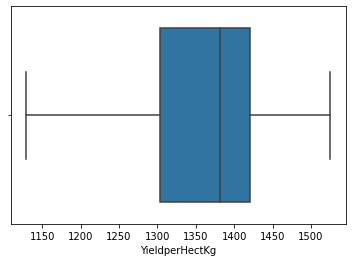

In [51]:
  sns.boxplot(data['YieldperHectKg'],orient='h')
   

#### Predictive Data Analytics

In [52]:
##Creating the train and test dataset

In [53]:
y =data['YieldperHectKg']
x =data.drop('YieldperHectKg',axis='columns')

In [54]:
#import train_test_split to split the data for training and testing
from sklearn.model_selection import train_test_split

In [55]:
#train_test_split is splitiing the data randomnly

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=50) #0.67 data will be for training.) #75% data will be for training and 25% data for testing

In [56]:
x_train.shape


(42, 5)

In [57]:
x_test.shape

(8, 5)

#### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lin_reg = LinearRegression() #creating object of LinearRegression

In [60]:
lin_reg.fit(x_train,y_train) #training and fitting LR object using training data

LinearRegression()

In [61]:
y_pred_testing =lin_reg.predict(x_test)
y_pred_testing

array([1395.36279852, 1383.4776222 , 1128.04719912, 1390.827431  ,
       1377.9491729 , 1415.15988933, 1367.86425845, 1419.84335457])

In [62]:
from sklearn.metrics import mean_squared_error #calculating MSE
LR_MSE_Test=mean_squared_error(y_pred_testing,y_test)
print("MSE for Testing:",LR_MSE_Test)


MSE for Testing: 1546.8315825693849


In [63]:
#Training Error
y_pred_training = lin_reg.predict(x_train)
LR_MSE_training=mean_squared_error(y_pred_training,y_train)
print("MSE for Training:",LR_MSE_training)

MSE for Training: 1660.8756234744155


In [64]:
LR_Acc_Trainig=lin_reg.score(x_train,y_train)  #trainig accuracy
LR_Acc_Trainig

0.8402693621934731

In [65]:
LR_Acc_Testing= lin_reg.score(x_test,y_test)  #testing accuracy
LR_Acc_Testing

0.8349993889856865

#### Lasso Regression

In [66]:
from sklearn.linear_model import Lasso

In [67]:
lasso =Lasso()

In [68]:
parameters = {'alpha': [22,23,24,25,26]}

In [69]:
from sklearn.model_selection import GridSearchCV #this is used for hyper parameter tuning

In [70]:
lasso_regressor = GridSearchCV(lasso, parameters)

In [71]:
lasso_regressor.fit(x_train, y_train)

GridSearchCV(estimator=Lasso(), param_grid={'alpha': [22, 23, 24, 25, 26]})

In [72]:
lasso_regressor.best_params_

{'alpha': 26}

In [73]:
lasso=Lasso(alpha=23)
lasso.fit(x_train,y_train)
y_pred_lasso=lasso.predict(x_test)
y_pred_lasso_trainig=lasso.predict(x_train)


In [74]:
Lasso_Testing_Error=mean_squared_error(y_pred_lasso,y_test)
Lasso_Testing_Error
print("MSE for Lasso Testing:",Lasso_Testing_Error)

MSE for Lasso Testing: 1858.6564672809925


In [75]:
Lasso_Training_Error=mean_squared_error(y_pred_lasso_trainig,y_train)
Lasso_Training_Error
print("MSE for Lasso Trainig:",Lasso_Training_Error)

MSE for Lasso Trainig: 1694.5882739585584


In [76]:
Lasso_Training_Accuracy=lasso_regressor.score(x_train,y_train)
Lasso_Training_Accuracy

0.8365757502641361

In [77]:
Lasso_Testing_Accuracy=lasso_regressor.score(x_test,y_test)
Lasso_Testing_Accuracy

0.8010618866100687

##### Ridge Regression

In [78]:
from sklearn.linear_model import Ridge

In [79]:
from sklearn.model_selection import GridSearchCV #this is used for hyper parameter tuning

alphavalues = [1185,1188,1089,]

solvervalues =['auto','svd']

ridge = Ridge()

parameters = {'alpha': alphavalues, 'solver':solvervalues} #regularization parameter dict

ridge_regressor = GridSearchCV(ridge, parameters)  #ridge object and ridge parameters

ridge_regressor.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1185, 1188, 1089],
                         'solver': ['auto', 'svd']})

In [80]:
#to get the best parameter for the model
ridge_regressor.best_params_

{'alpha': 1089, 'solver': 'auto'}

In [81]:
ridge=Ridge(alpha=1089,solver='auto')
ridge.fit(x_train,y_train)

Ridge(alpha=1089)

In [82]:
ypred_testing = ridge.predict(x_test)
ypred_training=ridge.predict(x_train)

In [83]:
Ridge_Error_Testing =mean_squared_error(ypred_testing,y_test)
Ridge_Error_Testing

1860.3228298111137

In [84]:
Ridge_Error_training =mean_squared_error(ypred_training,y_train)
Ridge_Error_training

1740.9021914329485

In [85]:
Ridge_Training_Accuracy=ridge.score(x_train,y_train) #Trainig accuracy
Ridge_Training_Accuracy

0.8325730033807984

In [86]:
Ridge_Testing_Accuracy=ridge.score(x_test,y_test) #Testing accuracy
Ridge_Testing_Accuracy

0.8015592601924769

#### Random forest

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
regressor =RandomForestRegressor()

In [88]:
n_estimator =[68,69,70,71,72]
criterion=['mse']
max_dept=[2,3,4,5,6]
parameter ={'n_estimators':n_estimator,'criterion':criterion,'max_depth':max_dept}

In [89]:
RF_reg=GridSearchCV(regressor,parameter)
RF_reg.fit(x_train,y_train)


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [68, 69, 70, 71, 72]})

In [90]:
RF_reg.best_params_

{'criterion': 'mse', 'max_depth': 3, 'n_estimators': 69}

In [91]:
regressor = RandomForestRegressor(n_estimators=71,criterion='mse',max_depth=3)

In [92]:
regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=71)

In [93]:
y_pred =regressor.predict(x_test)
ypred_traing=regressor.predict(x_train)

In [94]:
RF_Testing_Error=mean_squared_error(y_pred,y_test)
RF_Testing_Error


2870.249475065974

In [95]:
RF_Training_Error=mean_squared_error(ypred_traing,y_train)
RF_Training_Error


1157.2436871139262

In [96]:
RF_Trainig_Accuracy=regressor.score(x_train,y_train)#accuracy in training
RF_Trainig_Accuracy

0.888704927914109

In [97]:
RF_Testing_Accuracy=regressor.score(x_test,y_test)#accuracy in testing

In [98]:
d = {'Algorithm': ['Linear regression','Lasso regression','Ridge regression','Random Forest'], 
     'TrainingAccuracy': [LR_Acc_Trainig,Lasso_Training_Accuracy,Ridge_Training_Accuracy,RF_Trainig_Accuracy],
     'TestingAccuracy': [LR_Acc_Testing,Lasso_Testing_Accuracy,Ridge_Testing_Accuracy,RF_Testing_Accuracy],
     'TrainingError': [LR_MSE_training,Lasso_Training_Error,Ridge_Error_training,RF_Training_Error],
     'TestingError': [LR_MSE_Test,Lasso_Testing_Error
,Ridge_Error_Testing,RF_Testing_Error],}  
df = pd.DataFrame(data=d)
df

,Algorithm,TrainingAccuracy,TestingAccuracy,TrainingError,TestingError
0,Linear regression,0.840269,0.834999,1660.875623,1546.831583
1,Lasso regression,0.836576,0.801062,1694.588274,1858.656467
2,Ridge regression,0.832573,0.801559,1740.902191,1860.322830
3,Random Forest,0.888705,0.693830,1157.243687,2870.249475


In [99]:
#### Linear regression is the best fit algorithm for this problem